# This notebook plots spatial predictions
This notebook reads in the prediction shapefiles, along with `.tif` images of isochore thicknesses for the two formations and plots them along with the surface geology exposures of the Eastern Greater Green River Basin.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import rasterio
import rasterio.plot
from rasterio.warp import calculate_default_transform, reproject, Resampling
import geopandas as gpd
import seaborn as sns

In [2]:
sns.set()
sns.set_style("darkgrid", {"legend.frameon": True})
%matplotlib inline

In [3]:
TFUWELLS = gpd.read_file(r"predictions\ftunion_KNN_predictions_prob.shp")
KLAWELLS = gpd.read_file(r"predictions\lance_KNN_predictions_prob.shp")
LANCE = gpd.read_file(r"base_data\shapefiles\lance_outcrop.shp")
FTUN = gpd.read_file(r"base_data\shapefiles\ftunion_outcrop.shp")
FAULTS = gpd.read_file(r"base_data\shapefiles\simp_faults.shp")
SECTIONS = gpd.read_file(r"base_data\shapefiles\crossection.shp",)

In [4]:

DST_CRS = "EPSG:4326"

with rasterio.open(r"base_data\lance2864.tif") as src:
    TRANSFORM, WIDTH, HEIGHT = calculate_default_transform(
        src.crs, DST_CRS, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": DST_CRS, "transform": TRANSFORM, "width": WIDTH, "height": HEIGHT}
    )

    with rasterio.open(r"base_data\lance2864_reproject.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=TRANSFORM,
                DST_CRS=DST_CRS,
                resampling=Resampling.nearest,
            )

with rasterio.open(r"base_data\ftunion2864.tif") as src:
    TRANSFORM, WIDTH, HEIGHT = calculate_default_transform(
        src.crs, DST_CRS, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {"crs": DST_CRS, "transform": TRANSFORM, "width": WIDTH, "height": HEIGHT}
    )

    with rasterio.open(r"base_data\ftunion2864_reproject.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=TRANSFORM,
                DST_CRS=DST_CRS,
                resampling=Resampling.nearest,
            )

In [5]:
FU_BASE = rasterio.open(r"base_data\ftunion2864_reproject.tif")
LA_BASE = rasterio.open(r"base_data\lance2864_reproject.tif")

In [6]:
%%capture
TFUWELLS = TFUWELLS.to_crs("epsg:4326")
KLAWELLS = KLAWELLS.to_crs("epsg:4326")
LANCE = LANCE.to_crs("epsg:4326")
FTUN = FTUN.to_crs("epsg:4326")
FAULTS = FAULTS.to_crs("epsg:4326")
SECTIONS = SECTIONS.to_crs("epsg:4326")

In [7]:
TRUNCATION_COLOR = "#ffffbf"
ONLAP_COLOR = "#2c7bb6"
HORIZ_COLOR = "#d7191c"

truncCmap = LinearSegmentedColormap.from_list("mycmap", [ONLAP_COLOR, TRUNCATION_COLOR])
onlapCmap = LinearSegmentedColormap.from_list("mycmap", [TRUNCATION_COLOR, ONLAP_COLOR])
horizCmap = LinearSegmentedColormap.from_list("mycmap", [ONLAP_COLOR, HORIZ_COLOR])


In [8]:
FTHORIZ = TFUWELLS[(TFUWELLS.horiz_prob > 0.0)]
LAHORIZ = KLAWELLS[(KLAWELLS.horiz_prob > 0.0)]

Text(74.62989046066538, 0.5, 'Latitude')

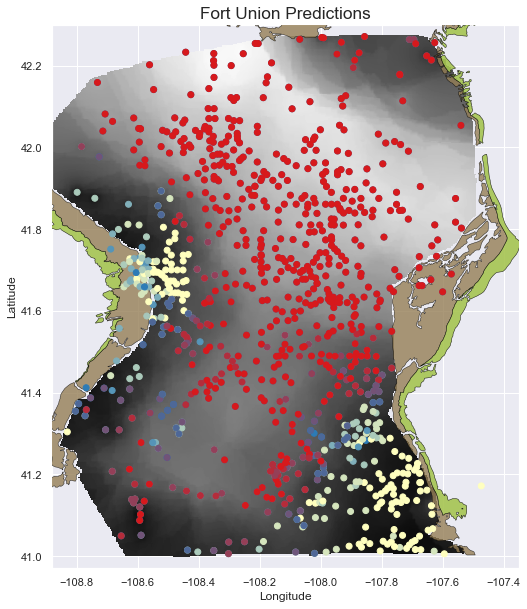

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(FU_BASE, ax=ax, cmap="gray", zorder=1)

TFUWELLS.plot(ax=ax, column="trunc_prob", cmap=truncCmap, vmin=0, vmax=1, zorder=4)
FTHORIZ.plot(ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=5)

kwarg2s = {"facecolor": "#957F56", "edgecolor": "black", "linewidth": 0.5, "hatch": ""}
FTUN.plot(ax=ax, zorder=3, label="Fort Union Outcrop", alpha=0.8, **kwarg2s)
kwarg3s = {"facecolor": "#A6C551", "edgecolor": "black", "linewidth": 0.5, "hatch": ""}
LANCE.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)

plt.title("Fort Union Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig('fortunion.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


Text(64.19487728580964, 0.5, 'Northing (m)')

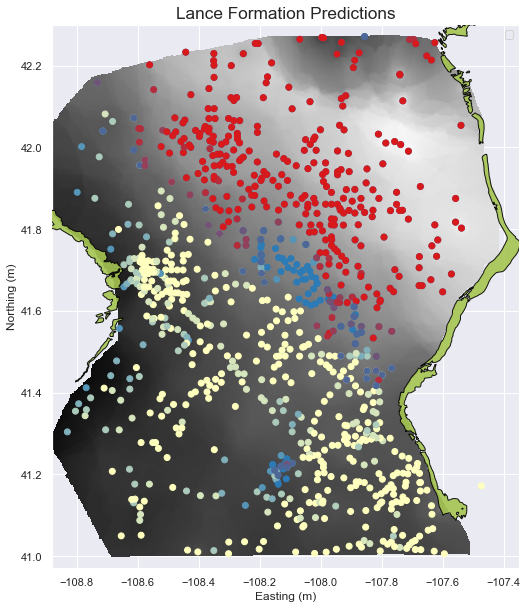

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(LA_BASE, ax=ax, cmap="gray", zorder=1)

KLAWELLS.plot(ax=ax, column="trunc_prob", cmap=truncCmap, vmin=0, vmax=1, zorder=4)
LAHORIZ.plot(ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=5)
LANCE.plot(ax=ax, color="#A6C551", edgecolor="black", zorder=3, alpha=0.9)
plt.legend()
plt.title("Lance Formation Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
# plt.savefig('lance_prob.pdf', bbox_inches='tight')